## Part 2: Reading Raster Data

### GDAL vs. Rasterio

#### GDAL

GDAL (Geospatial Data Abstraction Library) is an open-source library for working with geospatial data in different formats, such as raster and vector data. It provides a set of tools and utilities for reading, writing, and manipulating geospatial data, and is widely used in many geospatial software applications.

The GDAL library includes support for many common raster and vector data formats.

GDAL can be used with many programming languages, including Python, C++, Java, and others. In Python, the GDAL library can be accessed through the "gdal" module.

https://gdal.org/

We will not use the gdal binding, instead we use rasterio which is more pythonic.


#### Rasterio

Rasterio is a Python library for working with geospatial raster data. It provides a simple and efficient way to read and write raster data in different formats, and to manipulate and analyze it using Python.

Rasterio is built on top of the GDAL library, which is a powerful and widely used open-source library for working with geospatial data. However, Rasterio provides a more user-friendly and Pythonic interface than GDAL, making it easier for Python developers to work with raster data.

https://rasterio.readthedocs.io/en/stable/

In [1]:
import rasterio
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np

### Reading Raster Data (RGB Image)

In [2]:
dataset = rasterio.open('geodata/world.tif')

#### Dataset Attributes

To get the most important dataset attributes we can use meta:

In [3]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 21600,
 'height': 10800,
 'count': 3,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.016666666666666666, 0.0, -180.0,
        0.0, -0.016666666666666666, 90.0)}

We can also access the same and other attributes by directly calling them from dataset:

In [ ]:
dataset.name

In [ ]:
dataset.mode

In [ ]:
dataset.count

In [ ]:
dataset.indexes

In [ ]:
dataset.width

In [ ]:
dataset.height

In [ ]:
dataset.nodatavals 

In [ ]:
dataset.crs

In [4]:
dataset.transform 

Affine(0.016666666666666666, 0.0, -180.0,
       0.0, -0.016666666666666666, 90.0)

In [5]:
~dataset.transform

Affine(60.0, 0.0, 10800.0,
       0.0, -60.0, 5400.0)

In [ ]:
dataset.bounds

In [6]:
print(dataset.bounds.left)
print(dataset.bounds.bottom)
print(dataset.bounds.right)
print(dataset.bounds.top)

-180.0
-90.0
180.0
90.0


In [7]:
dataset.transform * (0, 0)  # Transformation Pixel(0,0)

(-180.0, 90.0)

In [8]:
~dataset.transform * (0, 0) # Inverse Transformation WGS84(0,0)

(10800.0, 5400.0)

In [9]:
~dataset.transform * (8.539434, 47.378109)

(11312.36604, 2557.31346)

In [10]:
px,py = ~dataset.transform * (8.539434, 47.378109)
print(px,py)

11312.36604 2557.31346


#### Reading Bands

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Datatypes of bands:

In [ ]:
dataset.dtypes

In [13]:
dataset = rasterio.open("geodata/world.tif")

r = dataset.read(1)
g = dataset.read(2)
b = dataset.read(3)

# scaled:
#r = dataset.read(1, out_shape=(100,200))
#g = dataset.read(2, out_shape=(100,200))
#b = dataset.read(3, out_shape=(100,200))

In [14]:
rgb = np.dstack((r,g,b))  # create (r,g,b) tuples for each pixel

#### Displaying using Matplotlib

Interpolations:
    
https://matplotlib.org/3.3.1/gallery/images_contours_and_fields/interpolation_methods.html

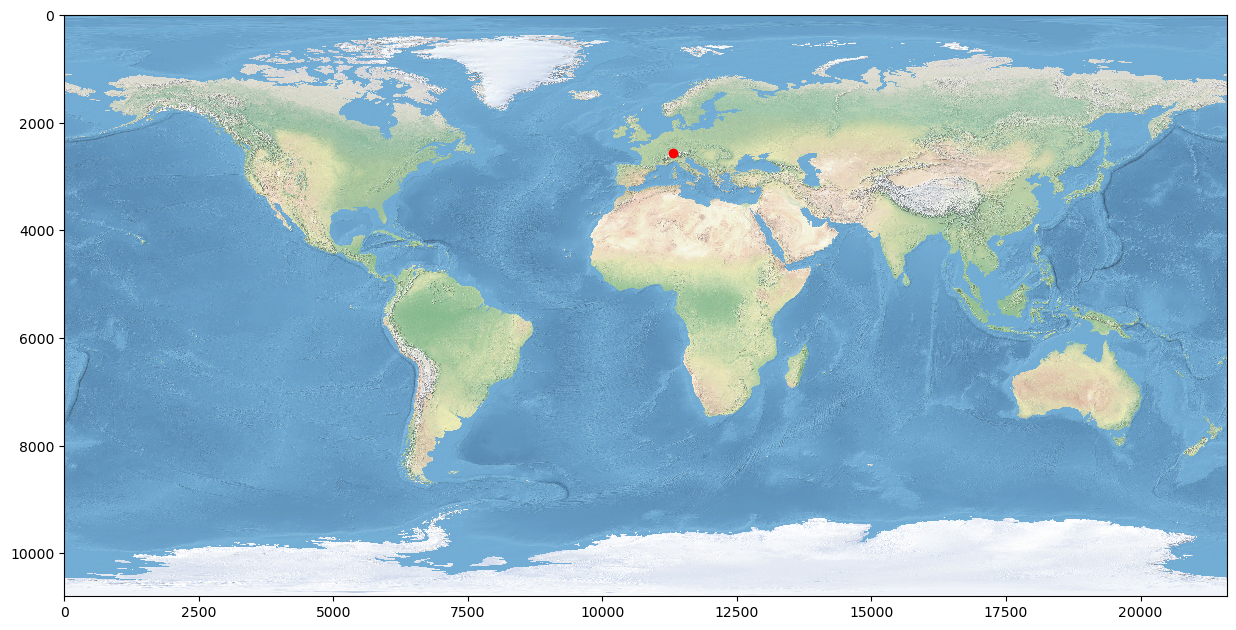

In [17]:
fig, ax = plt.subplots(figsize=(15,9))
ax.imshow(rgb, interpolation='nearest')
ax.plot(px,py, 'ro');

#### Display using rasterio.plot

It is also possible to directly plot the dataset, without calling read

In [ ]:
import rasterio.plot

rasterio.plot.show(dataset);

In [18]:
dataset.close()

In [21]:
del rgb